# ADP 
***
## 01. 정형 데이터 마이닝


### Q1) 데이터의 요약값을 보고 NA값이 10,000개 이상인 열을 제외하고 남은 변수 중 NA값이 있는 행을 제거하시오. 
###     그리고 AUS 데이터의 Date 변수를 Date형으로 변환하고, 
###     전처리가 완료된 weatherAUS 데이터를 train(70%), test(30%) 데이터로 분할하시오.
###     (set.seed(6789)를 실행한 후 데이터를 분할하시오.)

In [91]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [92]:
df = pd.read_csv("C:/Users/ksh/Desktop/나/ADP실기/모의고사 4회/weatherAUS.csv")

In [93]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    132863 non-null  object 
 6   WindGustSpeed  132923 non-null  float64
 7   WindDir9am     132180 non-null  object 
 8   WindDir3pm     138415 non-null  object 
 9   WindSpeed9am   140845 non-null  float64
 10  WindSpeed3pm   139563 non-null  float64
 11  Humidity9am    140419 non-null  float64
 12  Humidity3pm    138583 non-null  float64
 13  Pressure9am    128179 non-null  float64
 14  Pressure3pm    128212 non-null  float64
 15  Cloud9am       88536 non-null   float64
 16  Cloud3pm       85099 non-null   float64
 17  Temp9am        141289 non-nul

In [95]:
over_10000 = df.columns[df.isnull().sum() >= 10000]
over_10000 # 결측치 10000개 이상인 열 추출

Index(['WindDir9am', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'], dtype='object')

In [96]:
df= df.drop(over_10000, axis = 1) # 결측치 10000개 이상인 열 제거

In [97]:
df.Date = pd.to_datetime(df.Date)

In [98]:
df.dropna(how = 'any', inplace= True) # 결측값 존재하는 행 제거

In [99]:
over_10_unique = df.columns[df.describe(include= 'all').loc['unique'] >= 2] # unique값이 2개 이상인 컬럼 추출
over_10_unique[1:] # Date 컬럼 제외

Index(['Location', 'WindGustDir', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

In [100]:
df['month'] = df.Date.dt.month

In [101]:
df['day'] = df.Date.dt.dayofweek

In [102]:
for c in over_10_unique[1:] :
    encoer = LabelEncoder()
    df[c] = encoder.fit_transform(df[c])

In [103]:
X = df.drop(['Date','RainTomorrow'], axis = 1)
y = df.RainTomorrow

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 6789)

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90003, 16), (38573, 16), (90003,), (38573,))

***
### Q2) train 데이터로 종속변수인 RainTomorrow(다음날의 강수 여부)를 예측하는 분류모델을 
###     3개 이상 생성하고 test 데이터에 대한 예측값을 csv파일로 각각 제출하시오.

In [149]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [151]:
model1 = RandomForestClassifier(random_state = 6789)
model2 = GradientBoostingClassifier(random_state = 6789)
model3 = XGBClassifier(random_state = 6789)
model4 = LGBMClassifier(random_state = 6789)

In [152]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

LGBMClassifier(random_state=6789)

In [153]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

In [154]:
### LabelEncoder로 다시 reverse 해서 제출
submission1 = pd.DataFrame(encoder.inverse_transform(pred1), index = X_test.index,columns = ['RainTomorrow'])
submission2 = pd.DataFrame(encoder.inverse_transform(pred2), index = X_test.index,columns = ['RainTomorrow'])
submission3 = pd.DataFrame(encoder.inverse_transform(pred3), index = X_test.index,columns = ['RainTomorrow'])
submission4 = pd.DataFrame(encoder.inverse_transform(pred4), index = X_test.index,columns = ['RainTomorrow'])

In [116]:
### csv 저장

# submission1.to_csv('DecisionTree.csv', index = False)
# submission2.to_csv('GradientBoosting.csv', index = False)
# submission3.to_csv('XGBoost.csv', index = False)
# submission4.to_csv('LGBM.csv', index = False)

***
### Q3) 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 
###     또, ROC curve를 그리고 AUC값을 산출하시오.

In [155]:
from sklearn.metrics import classification_report, auc, roc_curve

In [156]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     33159
           1       0.49      0.75      0.59      5414

    accuracy                           0.85     38573
   macro avg       0.72      0.81      0.75     38573
weighted avg       0.89      0.85      0.87     38573



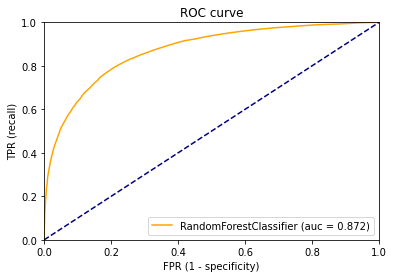

In [168]:
print(classification_report(pred1, y_test))

fpr, tpr,_ = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plot_roc_curve(fpr, tpr, model1.__class__.__name__, color = 'orange')

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     33154
           1       0.48      0.75      0.59      5419

    accuracy                           0.85     38573
   macro avg       0.72      0.81      0.75     38573
weighted avg       0.89      0.85      0.86     38573



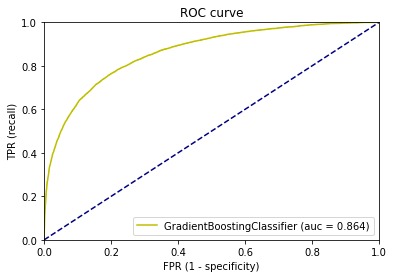

In [167]:
print(classification_report(pred2, y_test))

fpr, tpr,_ = roc_curve(y_test, model2.predict_proba(X_test)[:,1])
plot_roc_curve(fpr, tpr, model2.__class__.__name__, color = 'y')

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     32594
           1       0.53      0.74      0.62      5979

    accuracy                           0.86     38573
   macro avg       0.74      0.81      0.77     38573
weighted avg       0.88      0.86      0.87     38573



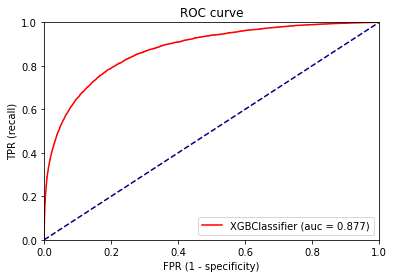

In [166]:
print(classification_report(pred3, y_test))

fpr, tpr,_ = roc_curve(y_test, model3.predict_proba(X_test)[:,1])
plot_roc_curve(fpr, tpr, model3.__class__.__name__, color = 'r')

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     32740
           1       0.52      0.75      0.62      5833

    accuracy                           0.86     38573
   macro avg       0.74      0.82      0.77     38573
weighted avg       0.89      0.86      0.87     38573



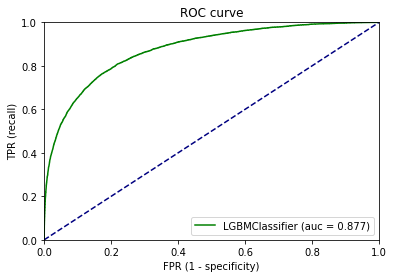

In [165]:
print(classification_report(pred4, y_test))

fpr, tpr,_ = roc_curve(y_test, model4.predict_proba(X_test)[:,1])
plot_roc_curve(fpr, tpr, model4.__class__.__name__, color = 'g')